In [1]:
import os
import pandas as pd
from pyspark.ml.feature import StringIndexer, OneHotEncoder
import plotly.express as px
import json

os.chdir('../')

In [2]:
from Utils.SparkSessionManager import SparkSessionManager
from Service.DataReader import DataReader
from Service.VMAnalyzer import VMAnalyzer

In [3]:
spark = SparkSessionManager.create_session()
dt_reader = DataReader(spark)
with open('settings.json', 'r') as file:
    data = json.load(file)

local_settings = data['Local']
filepath = local_settings['filepath']
input_file = local_settings['input']

csv_file, vmSchema = dt_reader.read_data(filepath, input_file)
dt_analyzer = VMAnalyzer(spark, csv_file, vmSchema)


In [4]:
dataFrame = dt_analyzer.get_df()
processed_df = dt_analyzer.pre_processing_pipeline()

In [5]:
columns = ["baseScore", "impactScore"]
dt_analyzer.calculate_range(dataFrame, columns)

+-------------+-------------+---------------+---------------+
|min_baseScore|max_baseScore|min_impactScore|max_impactScore|
+-------------+-------------+---------------+---------------+
|          2.1|         10.0|            1.4|            6.0|
+-------------+-------------+---------------+---------------+



+----------------+----------+
|   Attack Vector|Base Score|
+----------------+----------+
|ADJACENT_NETWORK|       8.8|
|           LOCAL|       7.8|
|         NETWORK|       7.5|
|        PHYSICAL|       6.8|
+----------------+----------+



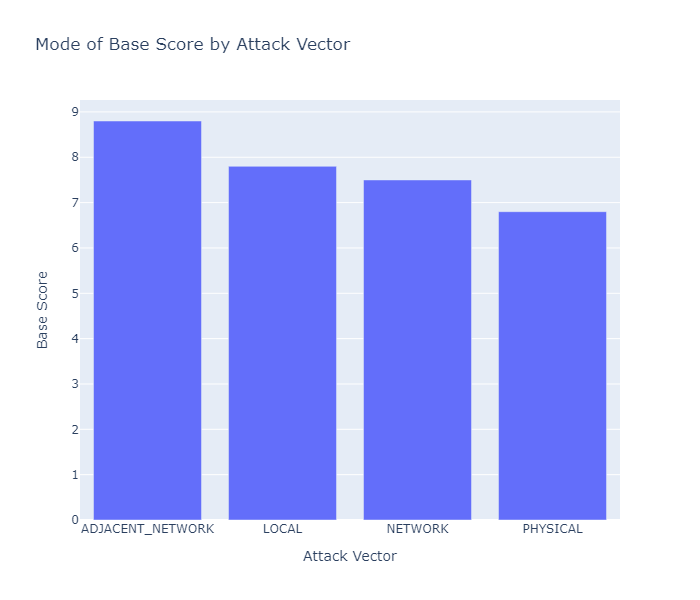

In [6]:

mode_df_base_score = dt_analyzer.calculate_mode_category(dataFrame, "attackVector", "baseScore", "Attack Vector", "Base Score")
dt_analyzer.show_bar_chart(mode_df_base_score, "Attack Vector", "Base Score", 700, 600, "Mode of Base Score by Attack Vector", "png")



+----------------+------------+
|   Attack Vector|Impact Score|
+----------------+------------+
|ADJACENT_NETWORK|         5.9|
|           LOCAL|         5.9|
|         NETWORK|         5.9|
|        PHYSICAL|         5.9|
+----------------+------------+



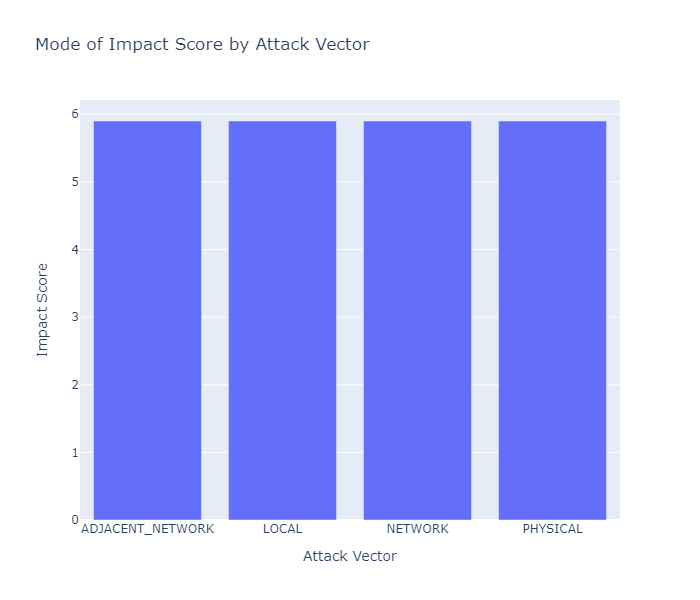

In [7]:
mode_df_impact_score = dt_analyzer.calculate_mode_category(dataFrame, "attackVector", "impactScore", "Attack Vector", "Impact Score")
dt_analyzer.show_bar_chart(mode_df_impact_score, "Attack Vector", "Impact Score", 700, 600, "Mode of Impact Score by Attack Vector", "png")

+----------------+--------------------+
|   Attack Vector|Exploitability Score|
+----------------+--------------------+
|ADJACENT_NETWORK|                 2.8|
|           LOCAL|                 1.8|
|         NETWORK|                 3.9|
|        PHYSICAL|                 0.9|
+----------------+--------------------+



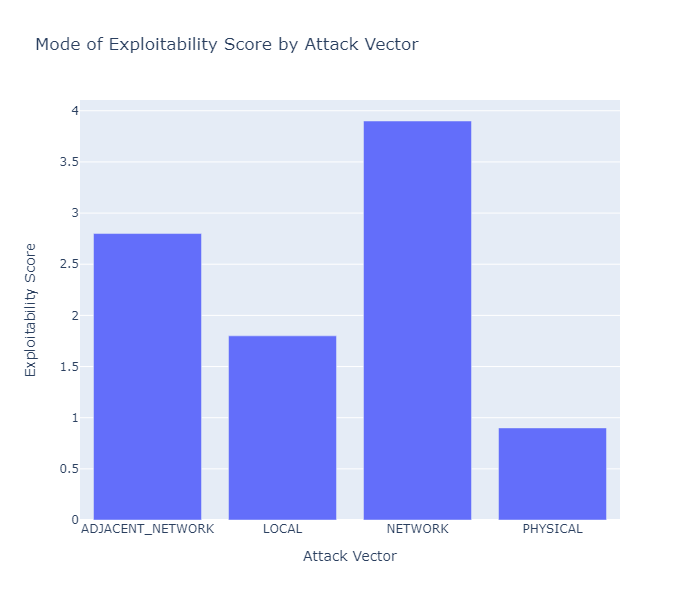

In [8]:
mode_df_exploitability_score = dt_analyzer.calculate_mode_category(dataFrame, "attackVector", "exploitabilityScore", "Attack Vector", "Exploitability Score")
dt_analyzer.show_bar_chart(mode_df_exploitability_score, "Attack Vector", "Exploitability Score", 700, 600, "Mode of Exploitability Score by Attack Vector", "png")

+----------------+------------------+
|   Attack Vector|        Base Score|
+----------------+------------------+
|ADJACENT_NETWORK|7.1443182826042175|
|           LOCAL|  6.64129519082938|
|         NETWORK| 7.354431876105042|
|        PHYSICAL| 5.635227303613316|
+----------------+------------------+



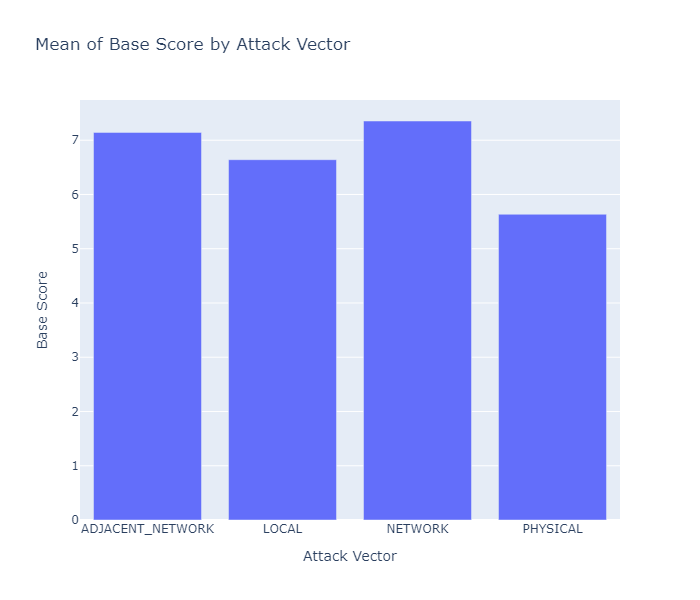

In [9]:
mean_df_base_score = dt_analyzer.calculate_mean_category(dataFrame, "attackVector", "baseScore", "Attack Vector", "Base Score")
dt_analyzer.show_bar_chart(mean_df_base_score, "Attack Vector", "Base Score", 700, 600, "Mean of Base Score by Attack Vector", "png")

+----------------+-----------------+
|   Attack Vector|     Impact Score|
+----------------+-----------------+
|ADJACENT_NETWORK|4.484090916135094|
|           LOCAL|4.866454366412639|
|         NETWORK|4.125634429602993|
|        PHYSICAL|4.695454545996406|
+----------------+-----------------+



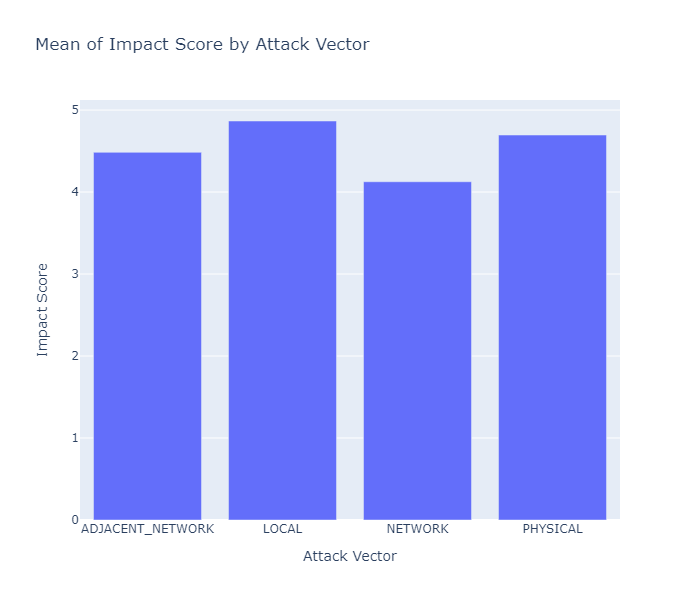

In [10]:
mean_df_impact_score = dt_analyzer.calculate_mean_category(dataFrame, "attackVector", "impactScore", "Attack Vector", "Impact Score")
dt_analyzer.show_bar_chart(mean_df_impact_score, "Attack Vector", "Impact Score", 700, 600, "Mean of Impact Score by Attack Vector", "png")

+----------------+--------------------+
|   Attack Vector|Exploitability Score|
+----------------+--------------------+
|ADJACENT_NETWORK|   2.543181771581823|
|           LOCAL|   1.657855589108862|
|         NETWORK|  3.0873115348570397|
|        PHYSICAL|  0.8295454347336834|
+----------------+--------------------+



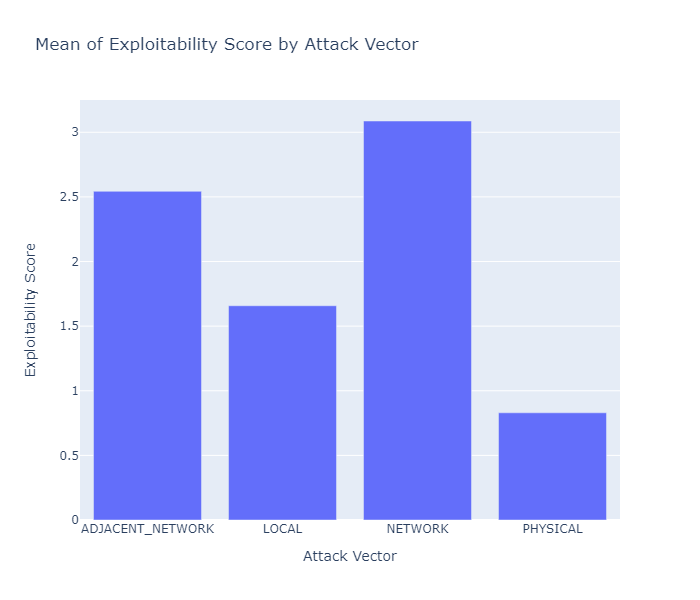

In [11]:
mean_df_exploitability_score = dt_analyzer.calculate_mean_category(dataFrame, "attackVector", "exploitabilityScore", "Attack Vector", "Exploitability Score")
dt_analyzer.show_bar_chart(mean_df_exploitability_score, "Attack Vector", "Exploitability Score", 700, 600, "Mean of Exploitability Score by Attack Vector", "png")

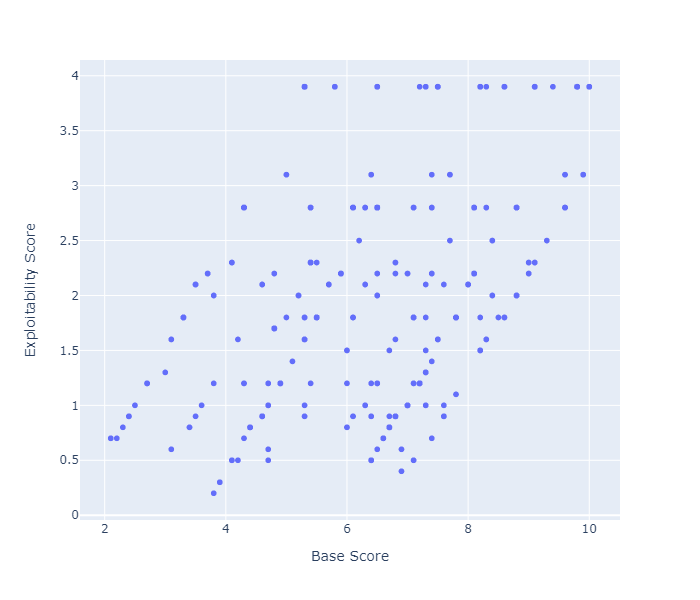

In [12]:
dt_analyzer.show_correlation_scatter_plot(processed_df, "baseScore", "exploitabilityScore", "Base Score", "Exploitability Score" , 700, 600, "", "png")

+----------------+------------+-----+
|    attackVector|baseSeverity|count|
+----------------+------------+-----+
|ADJACENT_NETWORK|    CRITICAL|    1|
|         NETWORK|         LOW|   23|
|           LOCAL|        HIGH|  509|
|ADJACENT_NETWORK|        HIGH|   41|
|        PHYSICAL|         LOW|    9|
|           LOCAL|         LOW|   50|
|        PHYSICAL|      MEDIUM|   72|
|         NETWORK|        HIGH| 1079|
|         NETWORK|      MEDIUM| 1076|
|ADJACENT_NETWORK|         LOW|    2|
|         NETWORK|    CRITICAL|  541|
|           LOCAL|    CRITICAL|    1|
|           LOCAL|      MEDIUM|  382|
|        PHYSICAL|        HIGH|    7|
|ADJACENT_NETWORK|      MEDIUM|   44|
+----------------+------------+-----+



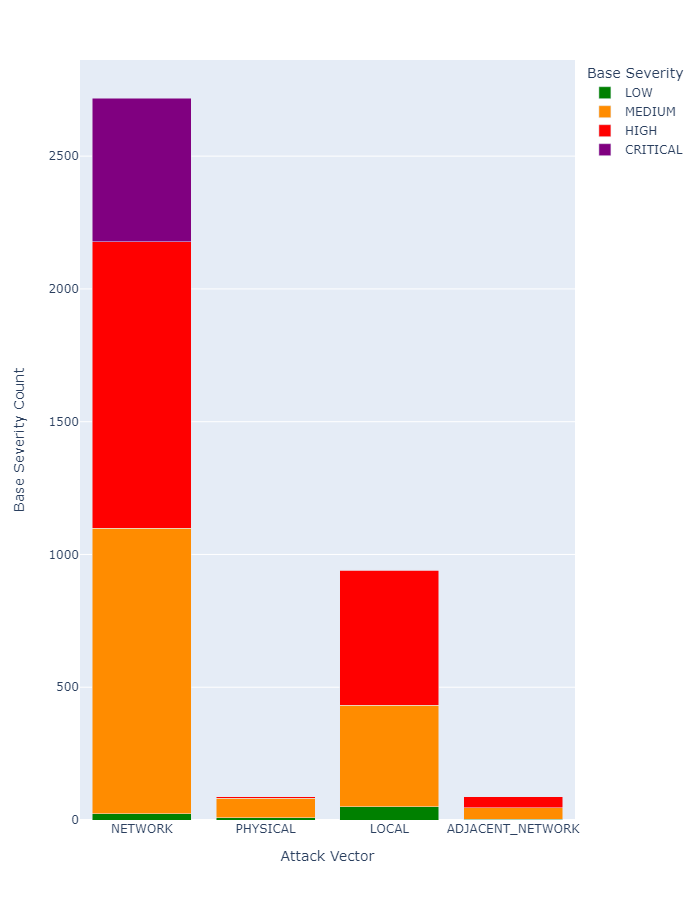

In [13]:
dt_analyzer.show_correlation_stacked_bar_chart(processed_df, "attackVector", "baseSeverity", "Attack Vector", "Base Severity" , 700, 900, "", "png")

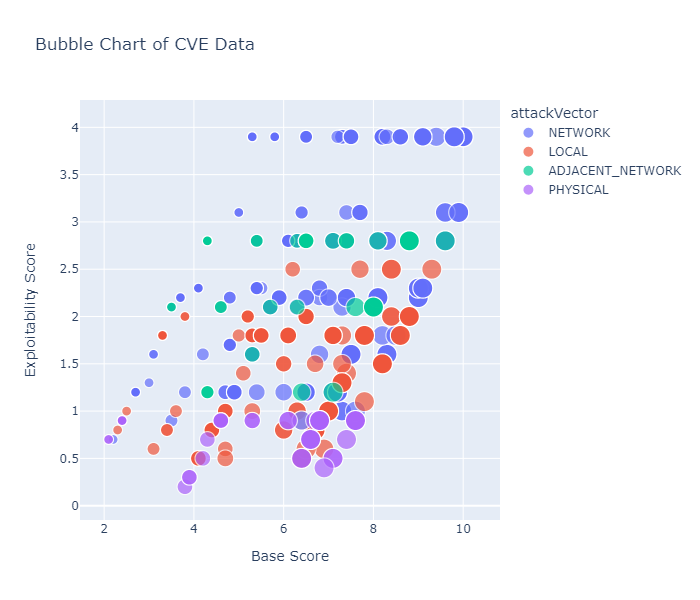

In [14]:
dt_analyzer.show_bubble_chart(processed_df, "baseScore", "exploitabilityScore", "Base Score", "Exploitability Score", "impactScore", "attackVector", 700, 600, "png")

In [15]:
dt_analyzer.check_correlation(processed_df, "ConfidentialityImpactNumeric", "IntegrityImpactNumeric")
column_display_info = [
    {"column_name": "ConfidentialityImpactNumeric", "display_name": "Confidentiality Impact"},
    {"column_name": "IntegrityImpactNumeric", "display_name": "Integrity Impact"},
    {"column_name": "AvailabilityImpactNumeric", "display_name": "Availability Impact"}
]
correlation_df = dt_analyzer.calculate_correlation(processed_df, column_display_info)
dt_analyzer.show_heatmap(correlation_df, 700, 600, "png")

0.7572788645793106
Correlation matrix:
                        Confidentiality Impact  Integrity Impact  \
Confidentiality Impact                1.000000          0.757279   
Integrity Impact                      0.757279          1.000000   
Availability Impact                   0.498010          0.606804   

                        Availability Impact  
Confidentiality Impact             0.498010  
Integrity Impact                   0.606804  
Availability Impact                1.000000  


In [16]:
dt_analyzer.check_correlation(processed_df, "baseScore", "impactScore")
columns = [
    {"column_name": "baseScore", "display_name": "Base Score"},
    {"column_name": "impactScore", "display_name": "Impact Score"},
]

correlation_df_score = dt_analyzer.calculate_correlation(processed_df, columns)
dt_analyzer.show_heatmap(correlation_df_score, 700, 600, "png")

0.8320470657436126
Correlation matrix:
              Base Score  Impact Score
Base Score      1.000000      0.832047
Impact Score    0.832047      1.000000
